<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pySTALAGMITE</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>STALAGMITE</b> modelling</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pySTALAGMITE.png"></td>
</tr>
</table>

----
# `pySTALAGMITE`

pySTALAGMITE, a program package prediction the shape of a stalagmite from pre-defined climate conditions.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sys

import libCHEM,libSTALAGMITE

----
# Calcium excess
In this notebook, we discuss a simple climate driver for the growth of stalagmites.

We define the calcium concentration of the drop arriving the in cave as $c_{in}$ [mol/m$^3$], and
the calcium equilibrium concentration in the cave as $c_{eq}$ [mol/m$^3$]:
$$
\begin{array}{rcl}
c_{in} &=& c_{eq}^{open/closed}(T_{soil},p_{soil}) \\
c_{eq} &=& c_{eq}^{open}(T_{cave},p_{cave})
\end{array}
$$
We follow our calculation of the **path of water**:

<img src='images/CHEM_PATH_Stalagmite.png'>


- $c_{in}$ is controlled by the flow of the drop through soil and epikarst, thus can be anything from zero
to equilibrium concentration, attained under open and/or closed conditions. 
In the figure, this is the path from **1** via **2** to **3**.

- $c_{eq}$ depends on temperature and CO$_2$-pressure in the cave, in the figure, this is point **4**,
because the drop has degassed its excess CO$_2$.

- After degassing, the drop has an **excess concentration**, $c_{in}-c_{eq}$, which is used for
precipitation, until point **5** is reached, the calcium equilibrium.

----
## Examples

### Temperature variation
As an example, we consider the annual surface temperature with -2$^{\circ}$C in winter and 20$^{\circ}$C,
and an average of 8$^{\circ}$C in the cave.

CO$_2$ partial pressure is 20000 ppm in the soil and 1000 ppm in the cave:
$$
\begin{array}{rcl}
T_{soil}(t) &=& T_{-2} + \big( T_{20}-T_{-2} \big) \frac{1 - \cos(2\pi t)}{2} \\
T_{cave}    &=& T_{10} \\
P_{soil}(t) &=& P_{20000} \\
P_{cave}    &=& P_{400}
\end{array}
$$

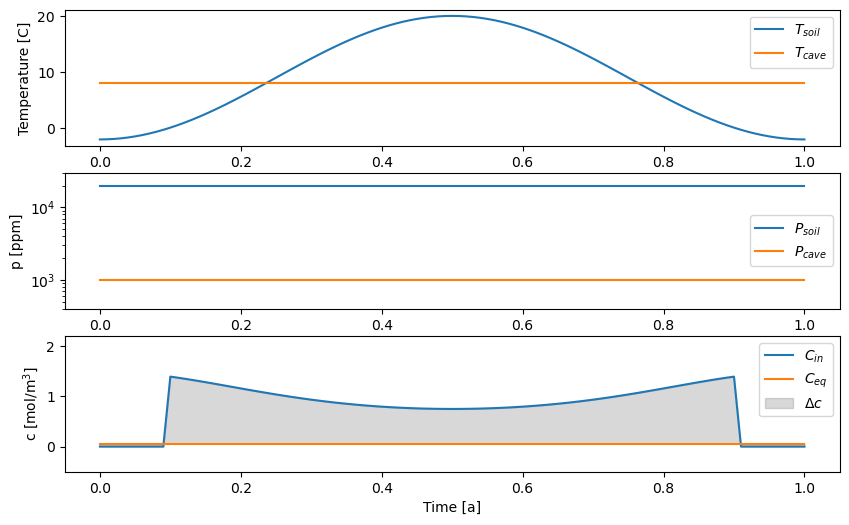

In [20]:
TSoilmin = -2
TSoilmax = 20
PSoilmin = 20000
PSoilmax = 20000
TCave    = 8
PCave    = 1000

time  = np.linspace(0,1,101)
TSoil = TSoilmin + (TSoilmax-TSoilmin)*0.5 * (1. - np.cos(2*np.pi*time))
PSoil = PSoilmin + (PSoilmax-PSoilmin)*0.5 * (1. - np.cos(2*np.pi*time))
TCave = np.ones_like(TSoil)*TCave
PCave = np.ones_like(TSoil)*PCave

Cin = np.zeros_like(TSoil);Ceq = np.zeros_like(TSoil)
for i in range(TSoil.shape[0]):
    if (TSoil[i] >= 0):
        Cin[i] = libCHEM.CEQ_limestone_closed(TSoil[i],PSoil[i]/1e6)
    else:
        Cin[i] = 0
    Ceq[i] = libCHEM.CEQ_limestone_closed(TCave[i],PCave[i]/1e6)

fig,axs = plt.subplots(3,1,figsize=(10,6))
#axs[0].set_xlabel('Time [a]')
axs[0].set_ylabel('Temperature [C]')
axs[0].plot(time,TSoil,label='$T_{soil}$')
axs[0].plot(time,TCave,label='$T_{cave}$')
axs[0].legend()

axs[1].set_ylim([400,30000])
axs[1].set_xlabel('Time [a]')
axs[1].set_ylabel('p [ppm]')
axs[1].set_yscale('log')
axs[1].plot(time,PSoil,label='$P_{soil}$')
axs[1].plot(time,PCave,label='$P_{cave}$')
axs[1].legend()

axs[2].set_ylim([-0.5,2.2])
axs[2].set_xlabel('Time [a]')
axs[2].set_ylabel('c [mol/m$^3$]')
axs[2].plot(time,Cin,label='$C_{in}$')
axs[2].plot(time,Ceq,label='$C_{eq}$')
axs[2].fill_between(time,Cin,Ceq,color='gray',alpha=0.3,label='$\Delta c$')
axs[2].legend()
plt.savefig('images/CalciumExcess1.png')

We observe a **calcium excess** during spring, summer and winter ($0.1-0.9$), with calcium excess concentrations up to 1.5 mol/m$^3$.
The minimum in summer is a result of the **retrograde** solubility of calcite.

----
### Temperature and carbon-dioxide variation
As an second example, we consider the annual surface temperature with -2$^{\circ}$C in winter and 20$^{\circ}$C,
and an average of 8$^{\circ}$C in the cave.

CO$_2$ partial pressure in the soil is 20000 ppm in summer, and 1000 ppm in winter, and 1000 ppm in the cave:
$$
\begin{array}{rcl}
T_{soil}(t) &=& T_{-2} + \big( T_{20}-T_{-2} \big) \frac{1 - \cos(2\pi t)}{2} \\
T_{cave}    &=& T_{10} \\
P_{soil}(t) &=& P_{1000} + \big( P_{20000}-P_{1000} \big) \frac{1 - \cos(2\pi t)}{2} \\
P_{cave}    &=& P_{400}
\end{array}
$$

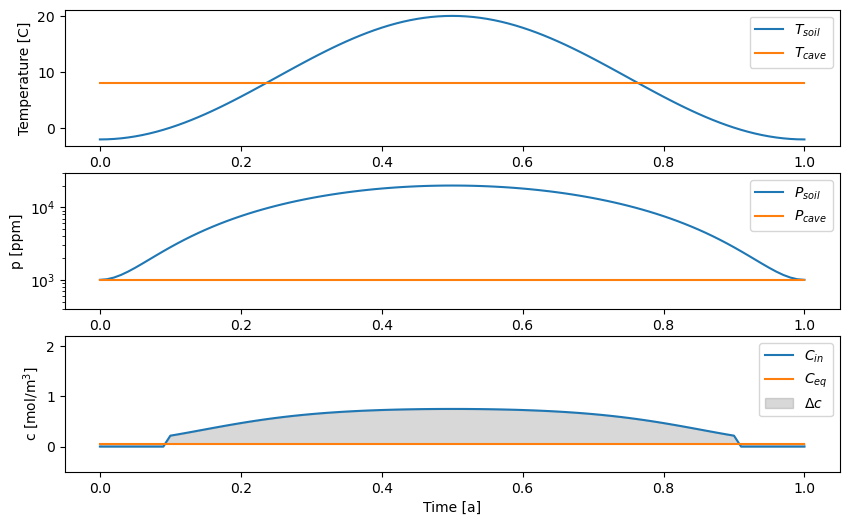

In [19]:
TSoilmin = -2
TSoilmax = 20
PSoilmin = 1000
PSoilmax = 20000
TCave    = 8
PCave    = 1000

time  = np.linspace(0,1,101)
TSoil = TSoilmin + (TSoilmax-TSoilmin)*0.5 * (1. - np.cos(2*np.pi*time))
PSoil = PSoilmin + (PSoilmax-PSoilmin)*0.5 * (1. - np.cos(2*np.pi*time))
TCave = np.ones_like(TSoil)*TCave
PCave = np.ones_like(TSoil)*PCave

Cin = np.zeros_like(TSoil);Ceq = np.zeros_like(TSoil)
for i in range(TSoil.shape[0]):
    if (TSoil[i] >= 0):
        Cin[i] = libCHEM.CEQ_limestone_closed(TSoil[i],PSoil[i]/1e6)
    else:
        Cin[i] = 0
    Ceq[i] = libCHEM.CEQ_limestone_closed(TCave[i],PCave[i]/1e6)

fig,axs = plt.subplots(3,1,figsize=(10,6))
#axs[0].set_xlabel('Time [a]')
axs[0].set_ylabel('Temperature [C]')
axs[0].plot(time,TSoil,label='$T_{soil}$')
axs[0].plot(time,TCave,label='$T_{cave}$')
axs[0].legend()

axs[1].set_ylim([400,30000])
axs[1].set_xlabel('Time [a]')
axs[1].set_ylabel('p [ppm]')
axs[1].set_yscale('log')
axs[1].plot(time,PSoil,label='$P_{soil}$')
axs[1].plot(time,PCave,label='$P_{cave}$')
axs[1].legend()

axs[2].set_ylim([-0.5,2.2])
axs[2].set_xlabel('Time [a]')
axs[2].set_ylabel('c [mol/m$^3$]')
axs[2].plot(time,Cin,label='$C_{in}$')
axs[2].plot(time,Ceq,label='$C_{eq}$')
axs[2].fill_between(time,Cin,Ceq,color='gray',alpha=0.3,label='$\Delta c$')
axs[2].legend()
plt.savefig('images/CalciumExcess2.png')

The **calcium excess** is lower now, as the carbon-dioxide partial pressure is also coupled to the seasons.
Also the retrograde behaviour resulting from temperature is hidden by the CO$_2$ effect.

----